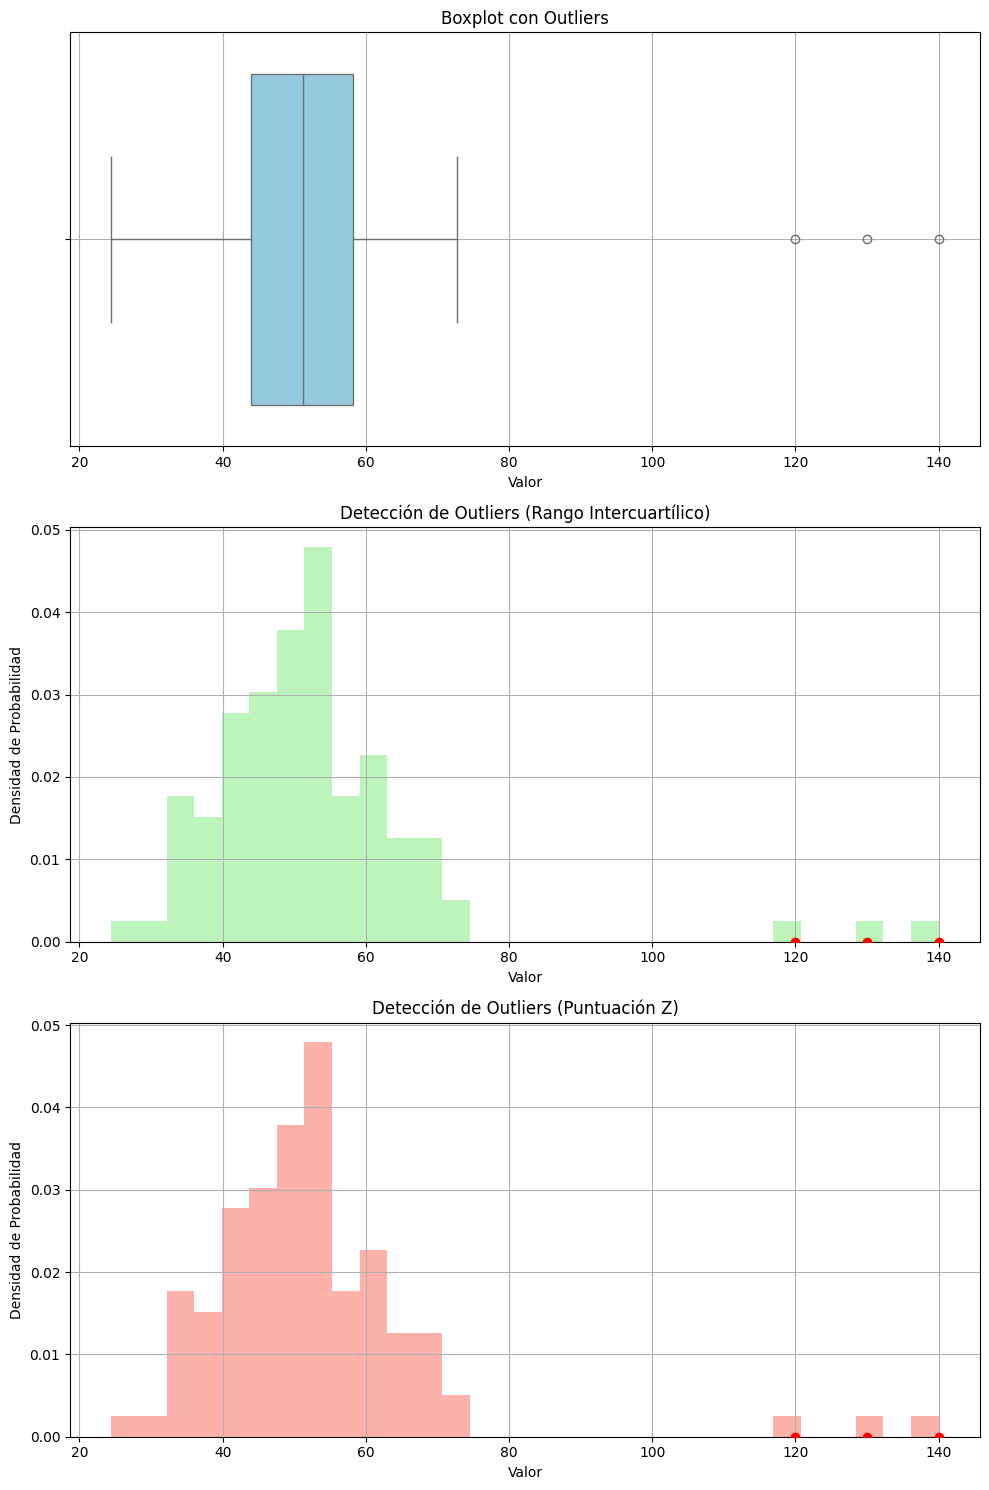

Outliers detectados con el método del Boxplot:
[120. 130. 140.]

Outliers detectados con el método del Rango Intercuartílico (IQR):
[120. 130. 140.]

Outliers detectados con el método de la Puntuación Z (Z-Score):
[120. 130. 140.]


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Generar datos con outliers
np.random.seed(0)
datos = np.random.normal(50, 10, 100)
datos = np.append(datos, [120, 130, 140])  # Añadir outliers

# Función para detectar outliers usando puntuación Z
def detectar_outliers_z(datos):
    z_scores = np.abs(stats.zscore(datos))
    outliers = np.where(z_scores > 3)
    return outliers[0]

# Función para detectar outliers usando el rango intercuartílico (IQR)
def detectar_outliers_iqr(datos):
    Q1 = np.percentile(datos, 25)
    Q3 = np.percentile(datos, 75)
    IQR = Q3 - Q1
    umbral_inferior = Q1 - 1.5 * IQR
    umbral_superior = Q3 + 1.5 * IQR
    outliers = np.where((datos < umbral_inferior) | (datos > umbral_superior))
    return outliers[0]

# Detectar outliers usando los tres métodos
outliers_z = detectar_outliers_z(datos)
outliers_iqr = detectar_outliers_iqr(datos)

# Crear gráfico de boxplot y marcar outliers detectados
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Primer subplot: Boxplot
sns.boxplot(data=datos, orient='h', ax=axs[0], color='skyblue')
axs[0].set_title('Boxplot con Outliers')
axs[0].set_xlabel('Valor')
axs[0].grid(True)

# Segundo subplot: Método del Rango Intercuartílico (IQR)
axs[1].hist(datos, bins=30, density=True, alpha=0.6, color='lightgreen')
axs[1].scatter(datos[outliers_iqr], np.zeros_like(datos[outliers_iqr]), color='red', zorder=5)
axs[1].set_title('Detección de Outliers (Rango Intercuartílico)')
axs[1].set_xlabel('Valor')
axs[1].set_ylabel('Densidad de Probabilidad')
axs[1].grid(True)

# Tercer subplot: Método de Puntuación Z
axs[2].hist(datos, bins=30, density=True, alpha=0.6, color='salmon')
axs[2].scatter(datos[outliers_z], np.zeros_like(datos[outliers_z]), color='red', zorder=5)
axs[2].set_title('Detección de Outliers (Puntuación Z)')
axs[2].set_xlabel('Valor')
axs[2].set_ylabel('Densidad de Probabilidad')
axs[2].grid(True)

# Ajustar el diseño para que no se superpongan los subplots
plt.tight_layout()
plt.show()

# Imprimir resultados
print("Outliers detectados con el método del Boxplot:")
print(datos[outliers_iqr])

print("\nOutliers detectados con el método del Rango Intercuartílico (IQR):")
print(datos[outliers_iqr])

print("\nOutliers detectados con el método de la Puntuación Z (Z-Score):")
print(datos[outliers_z])
